<a href="https://colab.research.google.com/github/ByeongKeun/Industrial-AI/blob/master/Industrial-AI/2021_1_%EC%82%B0%EC%97%85%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5%EA%B0%9C%EB%A1%A0/%EC%8B%A4%EC%8A%B5/2021_0520_PyTorch_CIFA10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))])

transnet = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(transnet, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [4]:
import matplotlib.pyplot as plt
import numpy as np

horse bird  cathorse


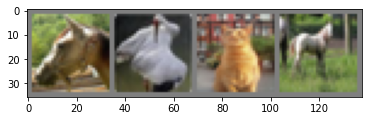

In [5]:
def imshow(img):
  img = img / 2 + 0.5 #unnormalize
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1,2,0)))

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print(''.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()

    self.conv1 = nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.fc1 = nn.Linear(16 * 5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x

In [7]:
net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [10]:
for epoch in range(10): #에포크 수
  running_loss = 0.0
  for i, data in enumerate(trainloader, 0):
    inputs, labels = data #학습데이터
    optimizer.zero_grad()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()
    if i % 2000 == 1999: #매 2000 mini batch마다 출력
      print('[%d, %5d] loss: %3f' % (epoch + 1, i +1, running_loss / 2000))
      running_loss = 0.0

print('Finished Training')      

[1,  2000] loss: 2.225862
[1,  4000] loss: 1.885279
[1,  6000] loss: 1.687316
[1,  8000] loss: 1.576675
[1, 10000] loss: 1.534532
[1, 12000] loss: 1.489884
[2,  2000] loss: 1.424739
[2,  4000] loss: 1.388345
[2,  6000] loss: 1.340070
[2,  8000] loss: 1.330079
[2, 10000] loss: 1.313358
[2, 12000] loss: 1.326292
[3,  2000] loss: 1.246976
[3,  4000] loss: 1.213598
[3,  6000] loss: 1.238996
[3,  8000] loss: 1.204402
[3, 10000] loss: 1.189783
[3, 12000] loss: 1.206274
[4,  2000] loss: 1.130457
[4,  4000] loss: 1.128255
[4,  6000] loss: 1.125894
[4,  8000] loss: 1.118548
[4, 10000] loss: 1.127824
[4, 12000] loss: 1.129175
[5,  2000] loss: 1.038910
[5,  4000] loss: 1.043410
[5,  6000] loss: 1.064333
[5,  8000] loss: 1.072904
[5, 10000] loss: 1.052466
[5, 12000] loss: 1.067038
[6,  2000] loss: 0.964573
[6,  4000] loss: 0.988684
[6,  6000] loss: 1.023452
[6,  8000] loss: 1.022054
[6, 10000] loss: 1.015360
[6, 12000] loss: 1.001477
[7,  2000] loss: 0.928369
[7,  4000] loss: 0.936956
[7,  6000] l